# How to find a good learning rate

Finding a good learning rate is very important when training models. If it's too large, the training will diverge, and if it's too low, training will be unnecessarily slow.

We can use a heuristic called the learning rate finder to find a good learning rate. It works by training with a very low learning rate and exponentially increasing it very quickly until the loss diverges. By plotting learning rates against losses we can find a good a value. 

We'll set up a `Learner` as usual:

In [ ]:
using FastAI
data = Datasets.loadtaskdata(Datasets.datasetpath("imagenette2-160"), ImageClassificationTask)
method = ImageClassification(Datasets.getclassesclassification("imagenette2-160"), (160, 160))
learner = methodlearner(method, data, Models.xresnet18(), ToGPU(), Metrics(accuracy))

Then we use the `LRFinderPhase` which handles the exponential learning rate scheduling and early termination. It will also reset the model when it is done.

In [97]:
phase = FastAI.LRFinderPhase(steps = 100, β = 0.02)
fit!(learner, phase)

Epoch 1 FastAI.LRFinderPhase(1.0e-7, 10, 100, 0.02, 4, nothing):  14%  ETA: 0:00:38

┌──────────────────────┬───────┬────────┬────────────┐
│                Phase │ Epoch │   Loss │ SmoothLoss │
├──────────────────────┼───────┼────────┼────────────┤
│ FastAI.LRFinderPhase │   1.0 │ 2.8504 │    23.4742 │
└──────────────────────┴───────┴────────┴────────────┘


Learner()

To visualize the results, you will need to import a plotting backend.

In [99]:
using CairoMakie

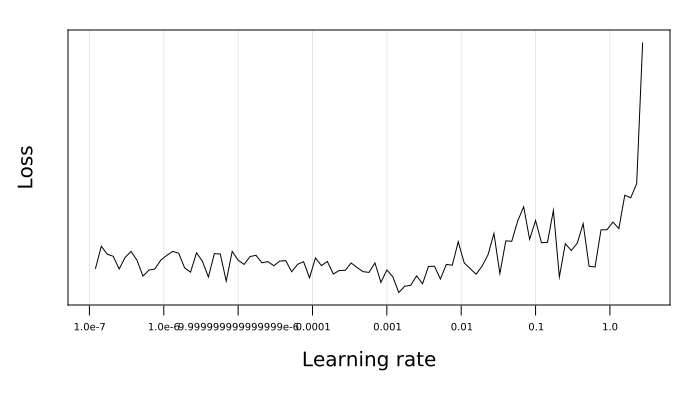

In [98]:
FastAI.plotlrfind(phase)

A good rule of thumb is to look at where the loss diverges and divide the learning rate at that point by 10. In this case this gives us a learning rate of about `0.1`. Let's use that to train our model:

In [ ]:
fitonecycle!(learner, 5, 0.1)